# Przeprowadzenie testów odnośnie rozmiarów:
okna poolingu i **typu poolingu**

In [25]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [26]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [27]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_type"
for pooling in [layers.MaxPooling2D, layers.AveragePooling2D]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation=ACT_RELU),
        pooling(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
all_titles.append("MaxPooling2D")
all_titles.append("AveragePooling2D")
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      16      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n              type filters kernel_size activation pool_size strides units
 1  0       KerasTensor                                                       
 2  1            Conv2D      16      (3, 3)       relu                        
 3  2  AveragePooling2D                                   (2, 2)  (1, 1)      
 4  3           Flatten                                                       
 5  4             Dense                                                     10]

In [28]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [29]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 24s 49ms/step - loss: 0.2679 - accuracy: 0.9244 - val_loss: 0.1288 - val_accuracy: 0.9632
Epoch 2/5
469/469 [==============================] - 21s 45ms/step - loss: 0.0974 - accuracy: 0.9723 - val_loss: 0.0868 - val_accuracy: 0.9729
Epoch 3/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0636 - val_accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0560 - accuracy: 0.9830 - val_loss: 0.0593 - val_accuracy: 0.9802
Epoch 5/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0489 - accuracy: 0.9858 - val_loss: 0.0574 - val_accuracy: 0.9826


 50%|█████     | 1/2 [01:53<01:53, 113.33s/it]

Epoch 1/5
469/469 [==============================] - 22s 44ms/step - loss: 0.3173 - accuracy: 0.9103 - val_loss: 0.1610 - val_accuracy: 0.9568
Epoch 2/5
469/469 [==============================] - 18s 39ms/step - loss: 0.1374 - accuracy: 0.9613 - val_loss: 0.0963 - val_accuracy: 0.9721
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0932 - accuracy: 0.9740 - val_loss: 0.0815 - val_accuracy: 0.9751
Epoch 4/5
469/469 [==============================] - 20s 43ms/step - loss: 0.0753 - accuracy: 0.9784 - val_loss: 0.0673 - val_accuracy: 0.9783
Epoch 5/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0651 - accuracy: 0.9812 - val_loss: 0.0602 - val_accuracy: 0.9803


100%|██████████| 2/2 [04:16<00:00, 128.38s/it]


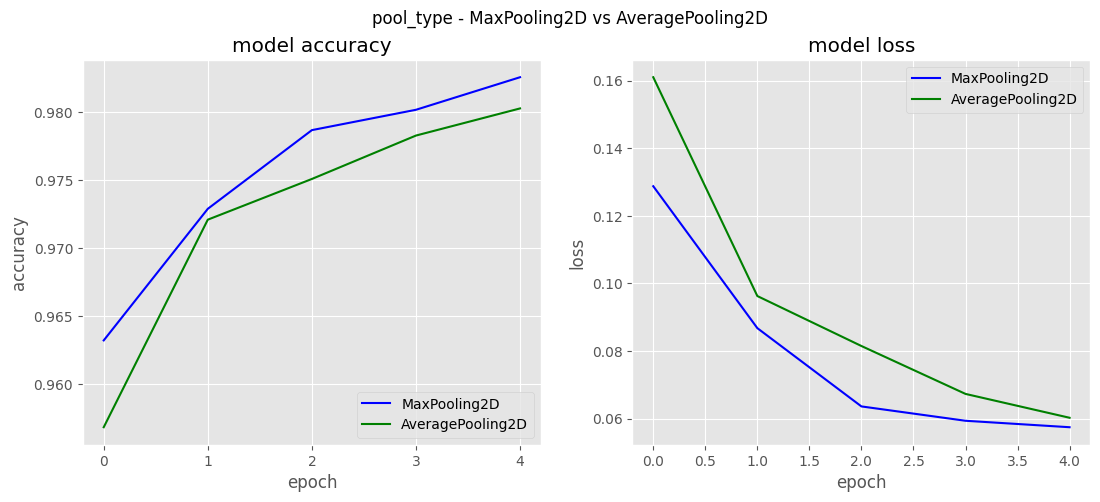

In [30]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)